# Calculating root mean square error (RMSE) for allelic ratios

### Supp. Fig. 4F

In [ ]:
# Function

#calculate RMSE
rmse <- function(act, pred){
        sqrt(mean((act - pred)^2))
}

line_plot <- function(df){
  p <- ggplot(df, aes(x = cell_type, y = rmse, color = clone, group = clone)) +
  geom_line(lwd = 1.2) +
  theme_bw(base_size = 20) +
  labs(y = "Root mean squre error") +
  ylim(0, 0.2) +
  theme(legend.position = "bottom", legend.title = element_blank()) +
  scale_colour_tableau(palette = "Classic 10")
  return(p)
}

In [ ]:
#Loading required libraries
suppressPackageStartupMessages({
    library(ASPEN)
    library(ggplot2)
    library(gridExtra)
    library(dplyr)
    library(reshape2)
    library(openxlsx)
    library(AnnotationHub)
    library(DESeq2)
    library(GGally)
    library(Matrix.utils)
})  

In [2]:
#loading data

cell_types <- c("Deep layer neurons", "Gliogenic progenitor cells", "Hippocampal neurons", "Inhibitory neurons", 
                "Intermediate neuronal prog", "Neurogenic progenitor cells", "Oligodendrocyte prog", "Preplate neurons")
res_dir <- "/data/bbtest_res/"
#Hippocamal neurons are not present in CastBl6 data
cast_bb_test <- list()
cast_bb_test_rdc <- list()
for (i in 1:length(cell_types[-3])){
    cast_bb_test[[i]] <- read.xlsx(paste0(res_dir, "organoids_CAST_exons.xlsx"), sheet = i, rowNames = T)
    cast_bb_test[[i]]$cell_type <- cell_types[-3][i]
    cast_bb_test[[i]]$strain <- "CastB6"
    cast_bb_test[[i]]$log2FC <- ifelse(is.na(cast_bb_test[[i]]$log2FC) & cast_bb_test[[i]]$AI == 1, 12, cast_bb_test[[i]]$log2FC)
    cast_bb_test[[i]]$log2FC <- ifelse(is.na(cast_bb_test[[i]]$log2FC) & cast_bb_test[[i]]$AI == 0, -12, cast_bb_test[[i]]$log2FC)
    cast_bb_test_rdc[[i]] <- cast_bb_test[[i]][,c("theta_reestim", "fdr_shrunk", "log2FC", "cell_type", "strain")]
}

molf_bb_test <- list()
molf_bb_test_rdc <- list()
for (i in 1:length(cell_types)){
    molf_bb_test[[i]] <- read.xlsx(paste0(res_dir, "organoids_MOLF_exons.xlsx"), sheet = i, rowNames = T)
    molf_bb_test[[i]]$cell_type <- cell_types[i]
    molf_bb_test[[i]]$strain <- "MolfB6"
    molf_bb_test[[i]]$log2FC <- ifelse(is.na(molf_bb_test[[i]]$log2FC) & molf_bb_test[[i]]$AI == 1, 12, molf_bb_test[[i]]$log2FC)
    molf_bb_test[[i]]$log2FC <- ifelse(is.na(molf_bb_test[[i]]$log2FC) & molf_bb_test[[i]]$AI == 0, -12, molf_bb_test[[i]]$log2FC) 
    molf_bb_test_rdc[[i]] <- molf_bb_test[[i]][,c("theta_reestim", "fdr_shrunk", "log2FC", "cell_type", "strain")]
}

#Hippocamal neurons are not present in PwkBl6 data
pwk_bb_test <- list()
pwk_bb_test_rdc <- list()
for (i in 1:length(cell_types[-3])){
    pwk_bb_test[[i]] <- read.xlsx(paste0(res_dir, "organoids_PWK_exons.xlsx"), sheet = i, rowNames = T)
    pwk_bb_test[[i]]$cell_type <- cell_types[-3][i]
    pwk_bb_test[[i]]$strain <- "PwkB6"
    pwk_bb_test[[i]]$log2FC <- ifelse(is.na(pwk_bb_test[[i]]$log2FC) & pwk_bb_test[[i]]$AI == 1, 12, pwk_bb_test[[i]]$log2FC)
    pwk_bb_test[[i]]$log2FC <- ifelse(is.na(pwk_bb_test[[i]]$log2FC) & pwk_bb_test[[i]]$AI == 0, -12, pwk_bb_test[[i]]$log2FC)
    pwk_bb_test_rdc[[i]] <- pwk_bb_test[[i]][,c("theta_reestim", "fdr_shrunk", "log2FC", "cell_type", "strain")]
}

spret_bb_test <- list()
spret_bb_test_rdc <- list()
for (i in 1:length(cell_types)){
    spret_bb_test[[i]] <- read.xlsx(paste0(res_dir, "organoids_SPRET_exons.xlsx"), sheet = i, rowNames = T)
    spret_bb_test[[i]]$cell_type <- cell_types[i]
    spret_bb_test[[i]]$strain <- "SpretB6"
    spret_bb_test[[i]]$log2FC <- ifelse(is.na(spret_bb_test[[i]]$log2FC) & spret_bb_test[[i]]$AI == 1, 12, spret_bb_test[[i]]$log2FC)
    spret_bb_test[[i]]$log2FC <- ifelse(is.na(spret_bb_test[[i]]$log2FC) & spret_bb_test[[i]]$AI == 0, -12, spret_bb_test[[i]]$log2FC)
    spret_bb_test_rdc[[i]] <- spret_bb_test[[i]][,c("theta_reestim", "fdr_shrunk", "log2FC", "cell_type", "strain")]
}

#removing low-abundant cell types - Hippocampal neurons, Inhibitory neurons
cast_bb_test_rdc <- cast_bb_test_rdc[-3]
molf_bb_test_rdc <- molf_bb_test_rdc[-c(3,4)]
pwk_bb_test_rdc <- pwk_bb_test_rdc[-3]
spret_bb_test_rdc <- spret_bb_test_rdc[-c(3,4)]

all_strains <- as.data.frame(do.call(rbind, c(cast_bb_test_rdc,
                                              molf_bb_test_rdc,
                                              pwk_bb_test_rdc,
                                              spret_bb_test_rdc))
)
#all_strains$test_signif <- ifelse(all_strains$fdr_shrunk < 0.05 & abs(all_strains$log2FC) >= 1, "Yes", "No") 
all_strains$test_signif <- ifelse(all_strains$fdr_shrunk < 0.05, "Yes", "No") 

In [3]:
#removing low-abundant cell types - Hippocampal neurons, Inhibitory neurons
cast_bb_test <- cast_bb_test[-3]
molf_bb_test <- molf_bb_test[-c(3,4)]
pwk_bb_test <- pwk_bb_test[-3]
spret_bb_test <- spret_bb_test[-c(3,4)]

In [4]:
genesXY <- read.table("/data/mm10_genesXY.txt")
genesIMPR <- read.xlsx("/data/Some_imprinted_genes.xlsx")
genes.exclude <- c(genesXY$V1, genesIMPR$imprinted.genes)

In [5]:
cast_bb_test_auts <- lapply(cast_bb_test, function(q) q[!(rownames(q) %in% genes.exclude),])
molf_bb_test_auts <- lapply(molf_bb_test, function(q) q[!(rownames(q) %in% genes.exclude),])
pwk_bb_test_auts <- lapply(pwk_bb_test, function(q) q[!(rownames(q) %in% genes.exclude),])
spret_bb_test_auts <- lapply(spret_bb_test, function(q) q[!(rownames(q) %in% genes.exclude),])

## BL6Cast

In [6]:
cast_ar <- list()
cast_ar <- lapply(cast_bb_test_auts[-2], function(q) round(q[,4:7]/q[,8:11], 2)) 
cast_ar[[6]] <- round(cast_bb_test_auts[[2]][,4:5]/cast_bb_test_auts[[2]][,6:7], 2)

In [81]:
cast_rmse <- list()
for(i in 1:length(cast_ar)){
    #cast_rmse[[i]] <- cbind(apply(cast_ar[[i]], 2, function(x) rmse(x, 0.54)))
    cast_rmse[[i]] <- cbind(apply(cast_ar[[i]], 2, function(x) rmse(x, mean(x))))                              
    cast_rmse[[i]] <- as.data.frame(cast_rmse[[i]])
    colnames(cast_rmse[[i]])[1] <- "rmse" 
    cast_rmse[[i]]$clone <- gsub(".*_", "", rownames(cast_rmse[[i]]))                           
    cast_rmse[[i]]$cell_type <-  cell_types[c(1,3:6,2)][i]                              
}

In [82]:
cast_rmse <- do.call(rbind, cast_rmse)
head(cast_rmse)

,rmse,clone,cell_type
,<dbl>,<chr>,<chr>
BL6_CastxBl6_clone1,0.1090082,clone1,Cortical neurons
BL6_CastxBl6_clone2,0.1164059,clone2,Cortical neurons
BL6_CastxBl6_clone3,0.1066295,clone3,Cortical neurons
BL6_CastxBl6_clone4,0.1311530,clone4,Cortical neurons
BL6_CastxBl6_clone11,0.1232590,clone1,IPCs
BL6_CastxBl6_clone21,0.1215718,clone2,IPCs


In [83]:
kruskal.test(clone ~ cell_type, data = cast_rmse) 


	Kruskal-Wallis rank sum test

data:  clone by cell_type
Kruskal-Wallis chi-squared = 1.3907, df = 5, p-value = 0.9253


In [24]:
compare_means(clone ~ cell_type, data = cast_rmse, method="kruskal")

.y.,p,p.adj,p.format,p.signif,method
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
clone,0.9253248,0.93,0.93,ns,Kruskal-Wallis


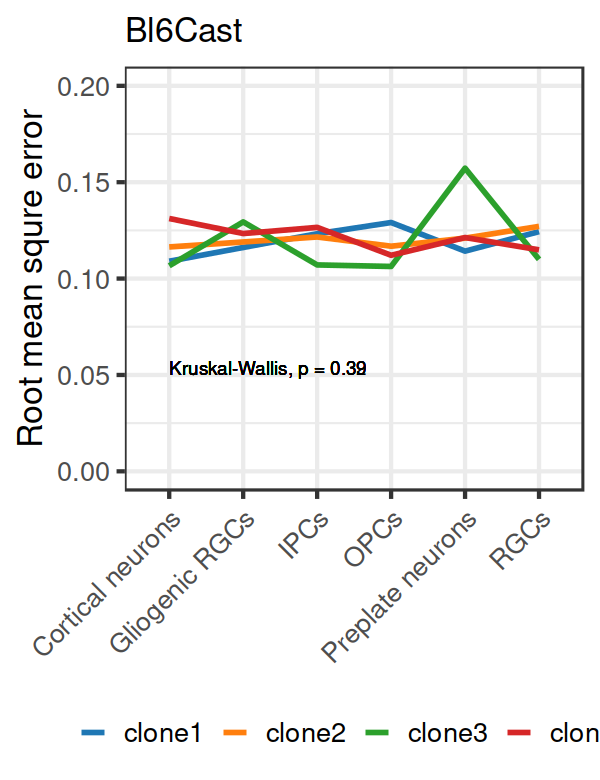

In [93]:
options(repr.plot.width = 5, repr.plot.height = 6.5)
    line_plot(cast_rmse) + labs(subtitle = "Bl6Cast") +
    stat_kruskal_test(label.x = 1, label.y = 0.05, hjust = 0) 

## Bl6Spret

In [ ]:
spret_ar <- list()
spret_ar <- lapply(spret_bb_test_auts[-2], function(q) round(q[,4:7]/q[,8:11], 2)) 
spret_ar[[6]] <- round(spret_bb_test_auts[[2]][,4:5]/spret_bb_test_auts[[2]][,6:7], 2)

In [87]:
spret_rmse <- list()
for(i in 1:length(spret_ar)){
    spret_rmse[[i]] <- cbind(apply(spret_ar[[i]], 2, function(x) rmse(x, mean(x))))                               
    spret_rmse[[i]] <- as.data.frame(spret_rmse[[i]])
    colnames(spret_rmse[[i]])[1] <- "rmse" 
    spret_rmse[[i]]$clone <- gsub(".*_", "", rownames(spret_rmse[[i]]))                           
    spret_rmse[[i]]$cell_type <-  cell_types[c(1,3:6,2)][i]                              
}

In [51]:
kruskal.test(cell_type ~ clone, data = spret_rmse) 


	Kruskal-Wallis rank sum test

data:  cell_type by clone
Kruskal-Wallis chi-squared = 0.16116, df = 3, p-value = 0.9836


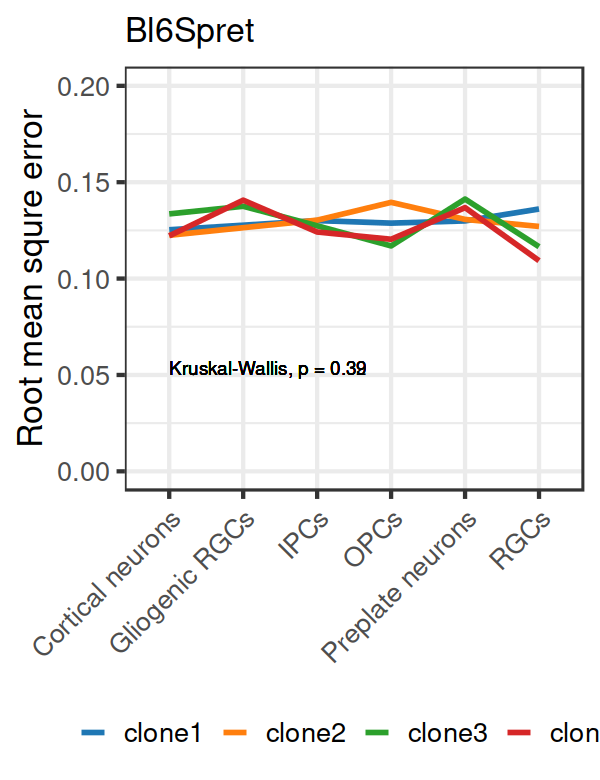

In [91]:
options(repr.plot.width = 5, repr.plot.height = 6.5)
    line_plot(spret_rmse) + labs(subtitle = "Bl6Spret") +
    stat_kruskal_test(label.x = 1, label.y = 0.05, hjust = 0) 

### Bl6Molf

In [ ]:
molf_ar <- list()
molf_ar <- lapply(molf_bb_test_auts[-2], function(q) round(q[,4:7]/q[,8:11], 2)) 
molf_ar[[6]] <- round(molf_bb_test_auts[[2]][,4:5]/molf_bb_test_auts[[2]][,6:7], 2)

In [95]:
molf_rmse <- list()
for(i in 1:length(molf_ar)){
    molf_rmse[[i]] <- cbind(apply(molf_ar[[i]], 2, function(x) rmse(x, mean(x))))
    molf_rmse[[i]] <- as.data.frame(molf_rmse[[i]])
    colnames(molf_rmse[[i]])[1] <- "rmse" 
    molf_rmse[[i]]$clone <- gsub(".*_", "", rownames(molf_rmse[[i]]))                           
    molf_rmse[[i]]$cell_type <-  cell_types[c(1,3:6,2)][i]                              
}

In [96]:
molf_rmse <- do.call(rbind, molf_rmse)
kruskal.test(clone ~ cell_type, data = molf_rmse) 


	Kruskal-Wallis rank sum test

data:  clone by cell_type
Kruskal-Wallis chi-squared = 1.3907, df = 5, p-value = 0.9253


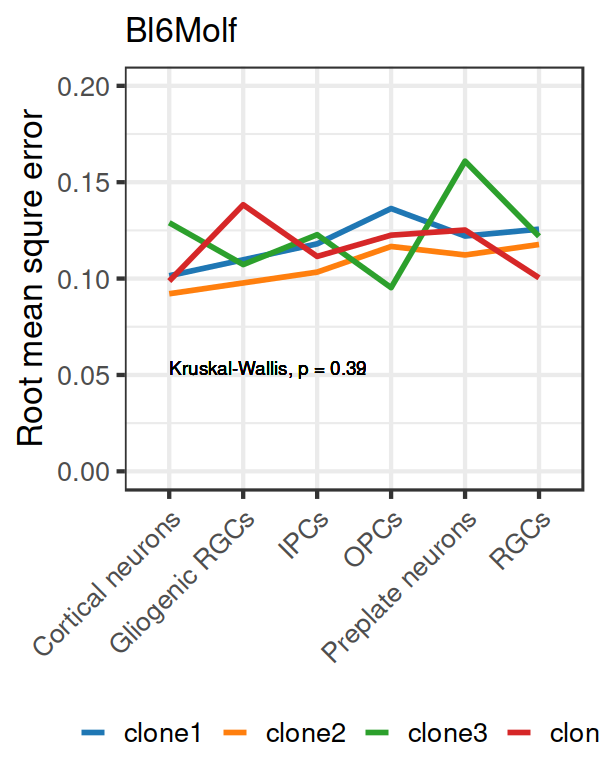

In [97]:
options(repr.plot.width = 5, repr.plot.height = 6.5)
    line_plot(molf_rmse) + labs(subtitle = "Bl6Molf") +
    stat_kruskal_test(label.x = 1, label.y = 0.05, hjust = 0) 

### Bl6Pwk

In [ ]:
pwk_ar <- list()
pwk_ar <- lapply(pwk_bb_test_auts[-2], function(q) round(q[,4:7]/q[,8:11], 2)) 
pwk_ar[[6]] <- round(pwk_bb_test_auts[[2]][,4:5]/pwk_bb_test_auts[[2]][,6:7], 2)

In [99]:
pwk_rmse <- list()
for(i in 1:length(pwk_ar)){
    pwk_rmse[[i]] <- cbind(apply(pwk_ar[[i]], 2, function(x) rmse(x, mean(x))))
    pwk_rmse[[i]] <- as.data.frame(pwk_rmse[[i]])
    colnames(pwk_rmse[[i]])[1] <- "rmse" 
    pwk_rmse[[i]]$clone <- gsub(".*_", "", rownames(pwk_rmse[[i]]))                           
    pwk_rmse[[i]]$cell_type <-  cell_types[c(1,3:6,2)][i]                              
}

In [100]:
pwk_rmse <- do.call(rbind, pwk_rmse)
kruskal.test(clone ~ cell_type, data = pwk_rmse) 


	Kruskal-Wallis rank sum test

data:  clone by cell_type
Kruskal-Wallis chi-squared = 1.3907, df = 5, p-value = 0.9253


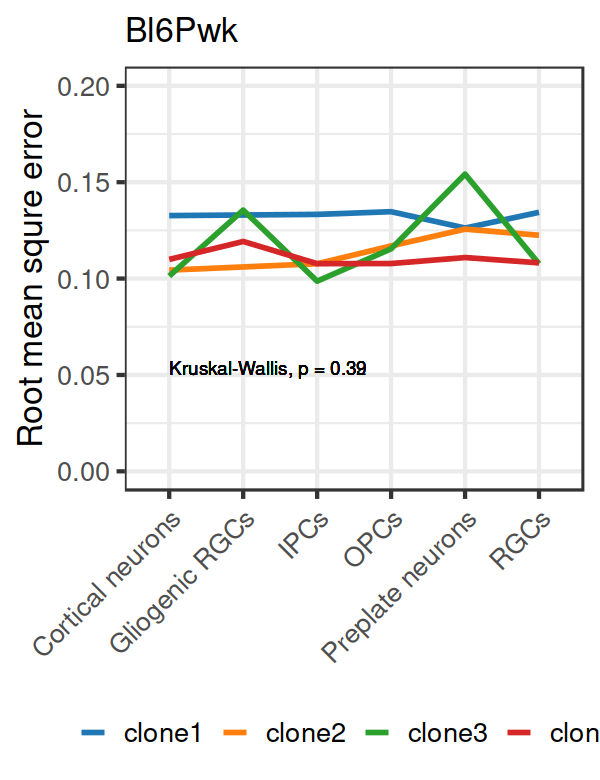

In [101]:
options(repr.plot.width = 5, repr.plot.height = 6.5)
    line_plot(pwk_rmse) + labs(subtitle = "Bl6Pwk") +
    stat_kruskal_test(label.x = 1, label.y = 0.05, hjust = 0) 